# Importing Standard Libraries

In [2]:
# Importing standard packages
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset
from IPython.display import display_html
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Ellipse
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Data Pre-processing

## Load the dataset

In [5]:
df = pd.read_csv(r"C:\Users\eyedo\Desktop\Capstone\CAPSTONE\marketing_campaign.csv")

In [6]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Standardizing column names

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [11]:
# Renaming mnt columns with sales
df.rename(columns=lambda x: x[3:] + '_sales' if x.startswith('mnt') else x, inplace=True)

In [12]:
# Reomving 'num' from column names as it is redundant
df.rename(columns=lambda x: x[3:] if x.startswith('num') else x, inplace=True)

In [13]:
# Changing purchases suffix to seperate
df.rename(columns=lambda x: x[:-9] + '_purchases' if x.endswith('purchases') else x, inplace=True)

## Standardizing column data type

In [15]:
# Changing object in to proper date time format
df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   marital_status       2240 non-null   object        
 4   income               2216 non-null   float64       
 5   kidhome              2240 non-null   int64         
 6   teenhome             2240 non-null   int64         
 7   dt_customer          2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   wines_sales          2240 non-null   int64         
 10  fruits_sales         2240 non-null   int64         
 11  meatproducts_sales   2240 non-null   int64         
 12  fishproducts_sales   2240 non-null   int64         
 13  sweetproducts_sales  2240 non-nul

In [16]:
## Drop redundant columns for the moment
df = df.drop(columns = ['acceptedcmp3','acceptedcmp2','acceptedcmp1','acceptedcmp4', 'acceptedcmp5'], axis= 1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   marital_status       2240 non-null   object        
 4   income               2216 non-null   float64       
 5   kidhome              2240 non-null   int64         
 6   teenhome             2240 non-null   int64         
 7   dt_customer          2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   wines_sales          2240 non-null   int64         
 10  fruits_sales         2240 non-null   int64         
 11  meatproducts_sales   2240 non-null   int64         
 12  fishproducts_sales   2240 non-null   int64         
 13  sweetproducts_sales  2240 non-nul

## Check for duplicates

In [19]:
# Check for specifically repeat customer IDs
df['id'].duplicated().sum()

0

In [20]:
df.duplicated().sum()

0

## Check for Null values

In [22]:
df.isna().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
wines_sales             0
fruits_sales            0
meatproducts_sales      0
fishproducts_sales      0
sweetproducts_sales     0
goldprods_sales         0
deals_purchases         0
web_purchases           0
catalog_purchases       0
store_purchases         0
webvisitsmonth          0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [23]:
df = df.dropna()
df.isna().sum()

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
wines_sales            0
fruits_sales           0
meatproducts_sales     0
fishproducts_sales     0
sweetproducts_sales    0
goldprods_sales        0
deals_purchases        0
web_purchases          0
catalog_purchases      0
store_purchases        0
webvisitsmonth         0
complain               0
z_costcontact          0
z_revenue              0
response               0
dtype: int64

In [24]:
df.sample(10)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,wines_sales,...,goldprods_sales,deals_purchases,web_purchases,catalog_purchases,store_purchases,webvisitsmonth,complain,z_costcontact,z_revenue,response
1393,5289,1975,2n Cycle,Single,41658.0,1,1,2012-11-09,30,8,...,29,2,1,1,2,4,0,3,11,0
760,10270,1981,2n Cycle,Married,35523.0,1,0,2013-10-03,8,11,...,11,2,3,0,3,7,0,3,11,0
571,3526,1968,PhD,Married,38443.0,1,1,2014-01-27,58,32,...,1,2,1,0,3,7,0,3,11,0
2172,4084,1975,Graduation,Together,60934.0,0,1,2014-01-17,41,224,...,54,2,6,4,11,4,0,3,11,0
1661,1404,1968,Graduation,Together,34916.0,2,0,2013-05-15,89,51,...,42,4,5,1,3,9,0,3,11,0
1246,4136,1992,Basic,Single,7500.0,1,0,2012-12-03,63,10,...,40,4,3,2,2,9,0,3,11,0
1510,486,1988,Graduation,Married,84219.0,0,0,2014-02-02,27,434,...,45,1,3,4,10,1,0,3,11,0
1191,8732,1969,Master,Widow,67369.0,0,1,2012-11-17,81,1298,...,42,4,7,4,10,4,0,3,11,1
77,7503,1976,Graduation,Single,75825.0,0,0,2012-10-12,40,1032,...,51,0,5,8,9,4,0,3,11,1
892,10925,1983,Graduation,Married,76630.0,0,0,2014-01-14,93,255,...,175,1,3,10,11,1,0,3,11,0


## Removing Redundancy

In [26]:
df['z_costcontact'].value_counts()

z_costcontact
3    2216
Name: count, dtype: int64

In [27]:
df['z_revenue'].value_counts()

z_revenue
11    2216
Name: count, dtype: int64

In [28]:
# Since both of these columns do not offer any useful information, lets drop them
df = df.drop(columns= ['z_costcontact', 'z_revenue'], axis= 1)

# Feature Engineering

## Calculate total revenue

In [31]:
# Total revenue generated from each customer by adding all their spenditure together
df['total_sales'] = df[['wines_sales','fruits_sales','meatproducts_sales','fishproducts_sales','sweetproducts_sales','goldprods_sales']].sum(axis=1)

In [32]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,wines_sales,...,sweetproducts_sales,goldprods_sales,deals_purchases,web_purchases,catalog_purchases,store_purchases,webvisitsmonth,complain,response,total_sales
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,88,3,8,10,4,7,0,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,6,2,1,1,2,5,0,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,21,42,1,8,2,10,4,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,5,2,2,0,4,6,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,27,15,5,5,3,6,5,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,118,247,2,9,3,4,5,0,0,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,8,7,8,2,5,7,0,0,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,12,24,1,2,3,13,6,0,0,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,30,61,2,6,5,10,3,0,0,843


## Calculate total number of purchases

In [34]:
df['total_purchases'] = df[['deals_purchases', 'web_purchases', 'catalog_purchases', 'store_purchases']].sum(axis=1)

## Calculate current date

Since this data set is of a 2 year timespan, we are under the assumption it is 2 years in front of the latest customer recorded. So, lets check what is the appropriate date for current time.

In [37]:
latest_date = df['dt_customer'].max()
print(latest_date)

2014-06-29 00:00:00


In [38]:
df['present_date'] = latest_date + DateOffset(years=2)

In [39]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,wines_sales,...,deals_purchases,web_purchases,catalog_purchases,store_purchases,webvisitsmonth,complain,response,total_sales,total_purchases,present_date
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,8,10,4,7,0,1,1617,25,2016-06-29
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,1,2,5,0,0,27,6,2016-06-29
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,8,2,10,4,0,0,776,21,2016-06-29
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,2,0,4,6,0,0,53,8,2016-06-29
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,5,3,6,5,0,0,422,19,2016-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,2,9,3,4,5,0,0,1341,18,2016-06-29
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,8,2,5,7,0,0,444,22,2016-06-29
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,2,3,13,6,0,0,1241,19,2016-06-29
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,2,6,5,10,3,0,0,843,23,2016-06-29


## Calculate the Customer Lifetime Value (CLV)

In [41]:
# 1. Calculate customer lifespan in years
df['customer_lifespan_years'] = (df['present_date'] - df['dt_customer']).dt.days / 365

# 2. Average purchase value
df['avg_purchase_value'] = df['total_sales'] / df['total_purchases']

# 3. Purchase frequency (purchases per year)
df['purchase_frequency'] = df['total_purchases'] / df['customer_lifespan_years']

# 4. Customer Lifetime Value (CLV)
df['clv'] = df['avg_purchase_value'] * df['purchase_frequency'] * df['customer_lifespan_years']

In [42]:
# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN (i.e., any former inf values)
df.dropna(inplace=True)

df.describe()

,id,year_birth,income,kidhome,teenhome,dt_customer,recency,wines_sales,fruits_sales,meatproducts_sales,...,webvisitsmonth,complain,response,total_sales,total_purchases,present_date,customer_lifespan_years,avg_purchase_value,purchase_frequency,clv
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212,2212.000000,2212.000000,2212.000000,2212.000000
mean,5584.082278,1968.826401,52197.422242,0.442134,0.506329,2013-07-10 05:51:32.224231424,48.991863,305.640145,26.401899,167.295660,...,5.316004,0.009494,0.150542,608.161844,14.907776,2016-06-29 00:00:00,2.971934,32.680497,5.098186,608.161844
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,1.000000,2016-06-29 00:00:00,2.002740,0.533333,0.280985,8.000000
25%,2813.250000,1959.000000,35335.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,69.000000,8.000000,2016-06-29 00:00:00,2.495890,9.714286,2.795331,69.000000
50%,5454.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,176.000000,8.000000,68.000000,...,6.000000,0.000000,0.000000,397.000000,15.000000,2016-06-29 00:00:00,2.978082,23.425214,4.893699,397.000000
75%,8418.500000,1977.000000,68487.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.500000,33.000000,233.250000,...,7.000000,0.000000,0.000000,1048.250000,21.000000,2016-06-29 00:00:00,3.452055,45.414583,7.030835,1048.250000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,2525.000000,44.000000,2016-06-29 00:00:00,3.917808,186.500000,15.869565,2525.000000
std,3247.827976,11.987656,24962.089394,0.537004,0.544248,NaN,28.949463,337.385857,39.815266,224.375135,...,2.408161,0.096994,0.357683,602.903243,7.651713,NaN,0.554581,28.626935,2.648952,602.903243


# Exploratary Data Analysis

Lets uncover some insights and trends of the dataset that we have. From this, we aim to see if we can predict customer lifetime value with their s[ending patterns and trends.

In [45]:
df.describe()

,id,year_birth,income,kidhome,teenhome,dt_customer,recency,wines_sales,fruits_sales,meatproducts_sales,...,webvisitsmonth,complain,response,total_sales,total_purchases,present_date,customer_lifespan_years,avg_purchase_value,purchase_frequency,clv
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212,2212.000000,2212.000000,2212.000000,2212.000000
mean,5584.082278,1968.826401,52197.422242,0.442134,0.506329,2013-07-10 05:51:32.224231424,48.991863,305.640145,26.401899,167.295660,...,5.316004,0.009494,0.150542,608.161844,14.907776,2016-06-29 00:00:00,2.971934,32.680497,5.098186,608.161844
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,1.000000,2016-06-29 00:00:00,2.002740,0.533333,0.280985,8.000000
25%,2813.250000,1959.000000,35335.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,69.000000,8.000000,2016-06-29 00:00:00,2.495890,9.714286,2.795331,69.000000
50%,5454.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,176.000000,8.000000,68.000000,...,6.000000,0.000000,0.000000,397.000000,15.000000,2016-06-29 00:00:00,2.978082,23.425214,4.893699,397.000000
75%,8418.500000,1977.000000,68487.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.500000,33.000000,233.250000,...,7.000000,0.000000,0.000000,1048.250000,21.000000,2016-06-29 00:00:00,3.452055,45.414583,7.030835,1048.250000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,2525.000000,44.000000,2016-06-29 00:00:00,3.917808,186.500000,15.869565,2525.000000
std,3247.827976,11.987656,24962.089394,0.537004,0.544248,NaN,28.949463,337.385857,39.815266,224.375135,...,2.408161,0.096994,0.357683,602.903243,7.651713,NaN,0.554581,28.626935,2.648952,602.903243


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2212 non-null   int64         
 1   year_birth               2212 non-null   int64         
 2   education                2212 non-null   object        
 3   marital_status           2212 non-null   object        
 4   income                   2212 non-null   float64       
 5   kidhome                  2212 non-null   int64         
 6   teenhome                 2212 non-null   int64         
 7   dt_customer              2212 non-null   datetime64[ns]
 8   recency                  2212 non-null   int64         
 9   wines_sales              2212 non-null   int64         
 10  fruits_sales             2212 non-null   int64         
 11  meatproducts_sales       2212 non-null   int64         
 12  fishproducts_sales       2212 non-null 

In [47]:
# Lets create boxplots to view distributions of the different features in our dateset
box_df = df.drop(columns=['id','present_date', 'dt_customer','education','marital_status', 'complain', 'response', 'kidhome', 'teenhome', 'total_sales', 'total_purchases'], axis= 1)

box_df.shape

(2212, 18)

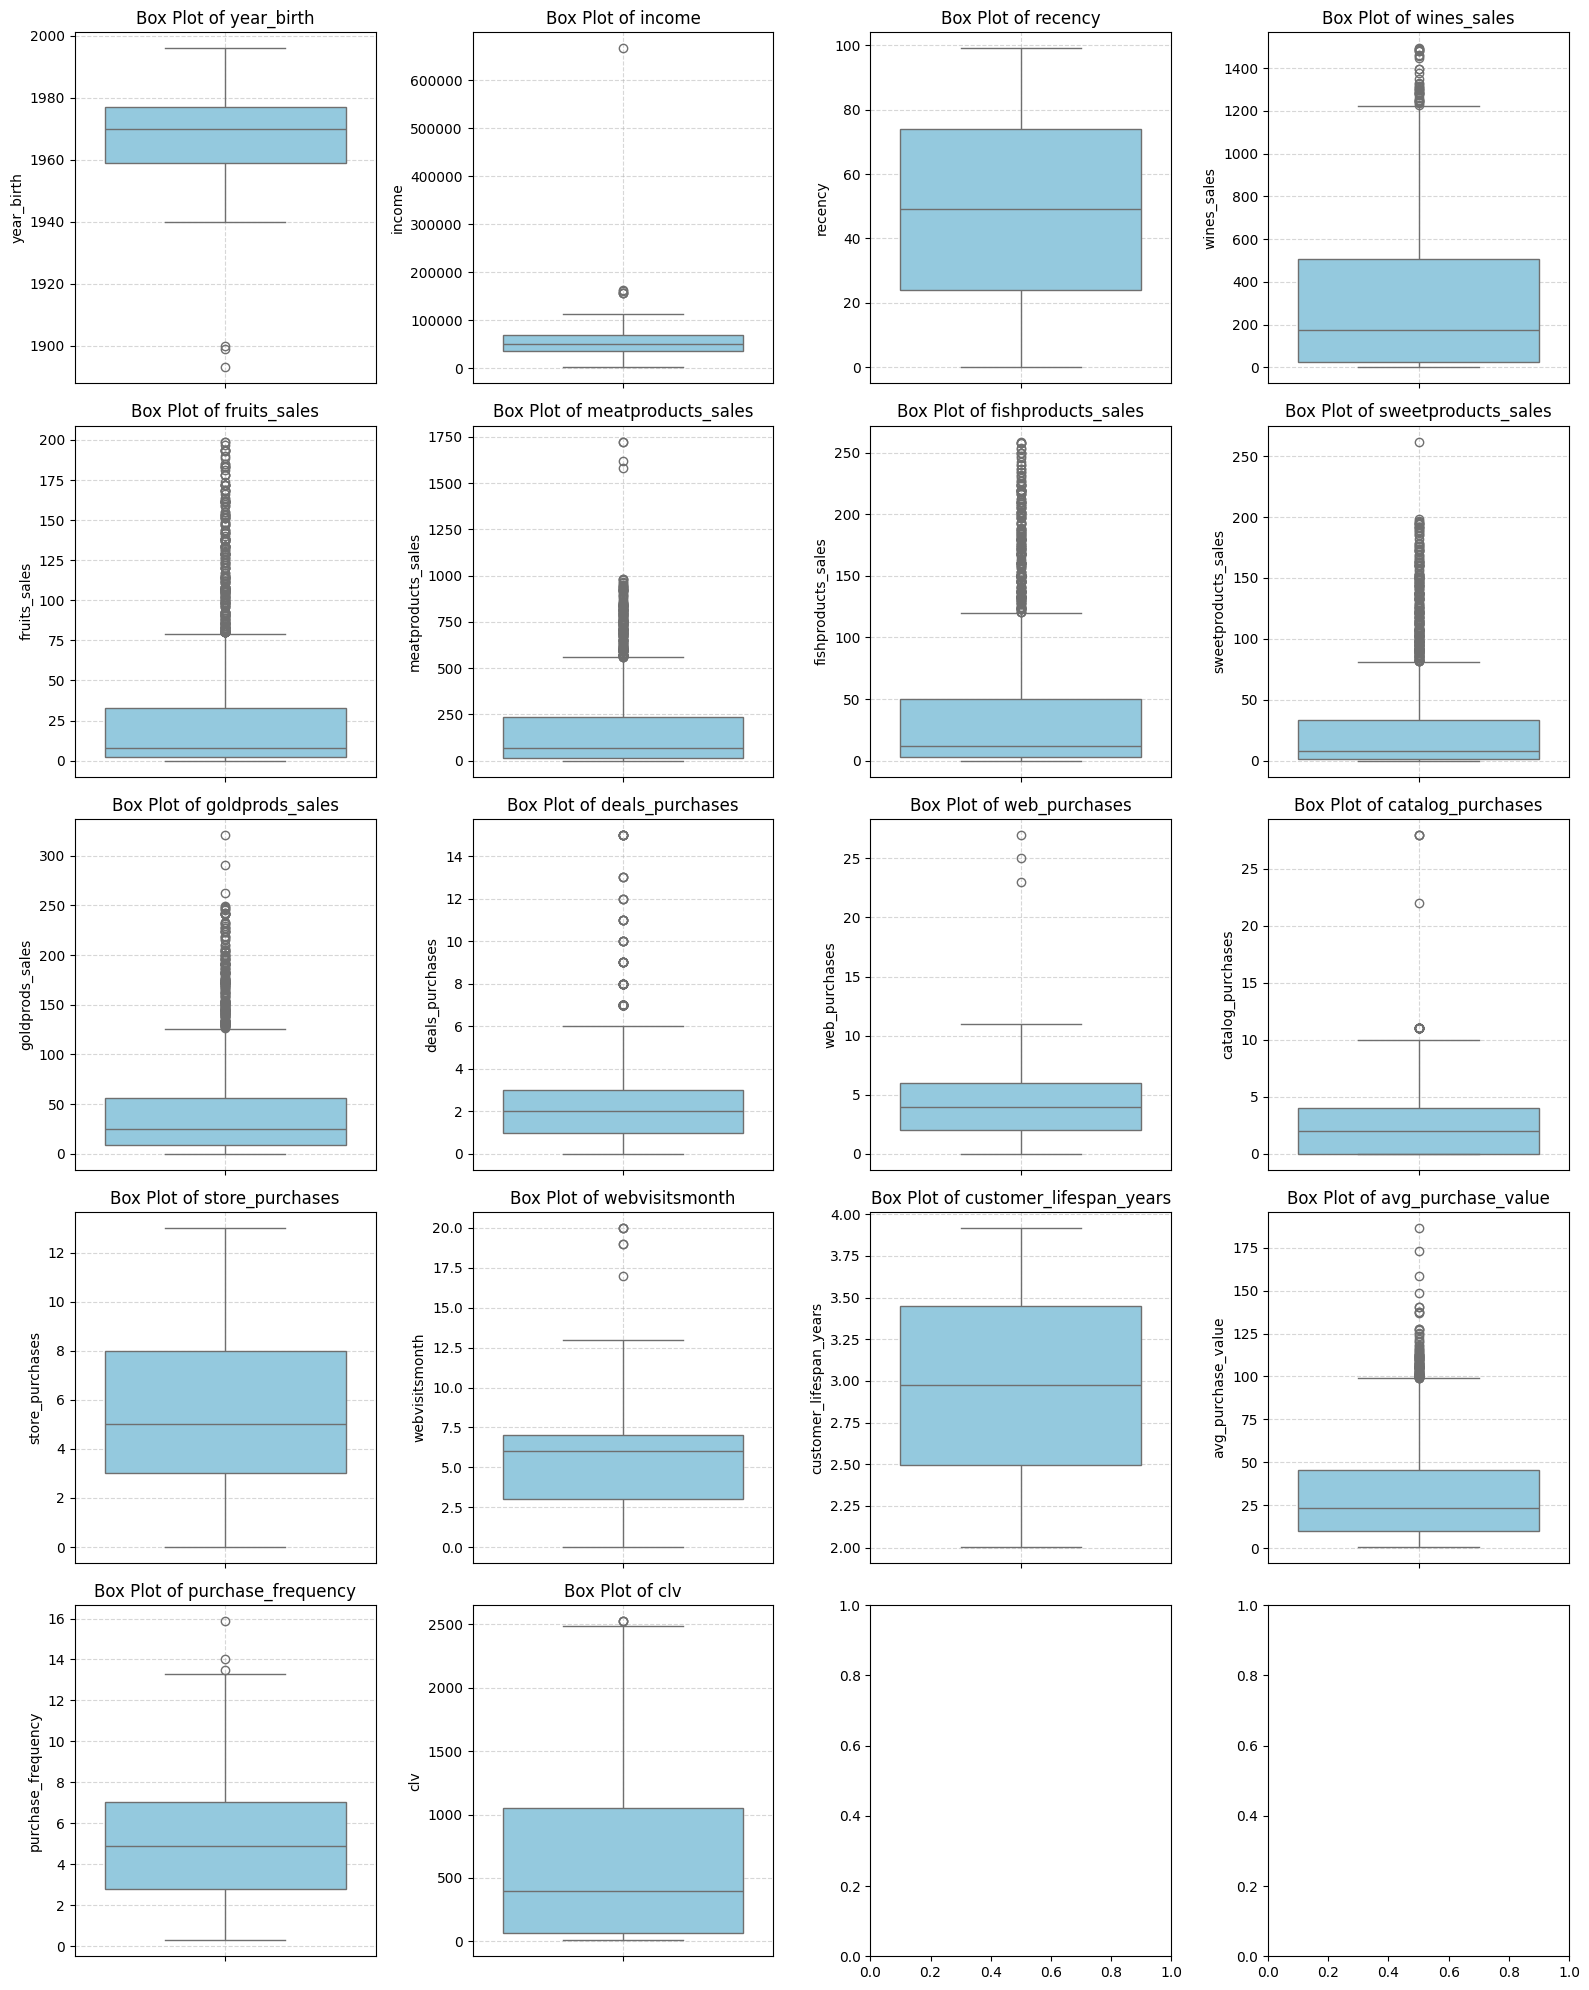

In [48]:
# Set up the 5x4 subplot layout (5 rows and 4 columns)
fig, axes = plt.subplots(5, 4, figsize=(16, 20))  # 5 rows, 4 columns

# Loop through each column and create a box plot
for i, col in enumerate(box_df.columns):
    row = i // 4  # Determine the row index
    col_idx = i % 4  # Determine the column index
    sns.boxplot(data=box_df, y=col, ax=axes[row, col_idx], color='skyblue')
    axes[row, col_idx].set_title(f'Box Plot of {col}')
    axes[row, col_idx].grid(True, linestyle='--', alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Customer Demographics

## Age metrics

In [51]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,wines_sales,...,webvisitsmonth,complain,response,total_sales,total_purchases,present_date,customer_lifespan_years,avg_purchase_value,purchase_frequency,clv
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,1,1617,25,2016-06-29,3.819178,64.680000,6.545911,1617.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,27,6,2016-06-29,2.312329,4.500000,2.594787,27.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,776,21,2016-06-29,2.857534,36.952381,7.348993,776.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,53,8,2016-06-29,2.383562,6.625000,3.356322,53.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,422,19,2016-06-29,2.443836,22.210526,7.774664,422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,1341,18,2016-06-29,3.046575,74.500000,5.908273,1341.0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,444,22,2016-06-29,2.054795,20.181818,10.706667,444.0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,0,1241,19,2016-06-29,2.427397,65.315789,7.827314,1241.0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,843,23,2016-06-29,2.430137,36.652174,9.464487,843.0


In [52]:
df['age'] = 2016 - df['year_birth']

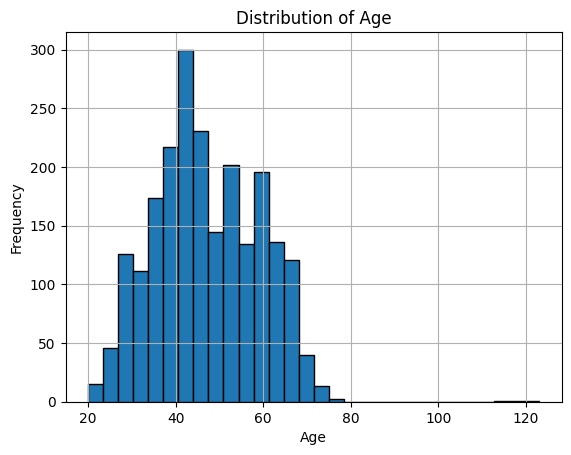

In [53]:
# Histogram of the age groups
plt.hist(df['age'], bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.savefig('Age_distribution.png', transparent=True)
plt.show()

In [54]:
# Drop rows where age is above 100
df = df[df['age'] <= 100]

## Education Metrics

In [56]:
df['education'].value_counts()

education
Graduation    1113
PhD            479
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64

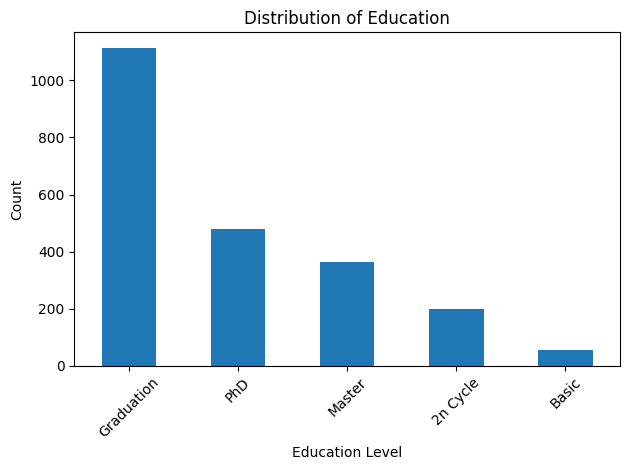

In [57]:
# Bar Chart of the education column
df['education'].value_counts().plot(kind='bar')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Education_distribtuion.png', transparent=True)
plt.show()

## Income Distribution of Customers

In [59]:
df['income'].describe()

count      2209.000000
mean      52186.665459
std       24967.363316
min        1730.000000
25%       35322.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: income, dtype: float64

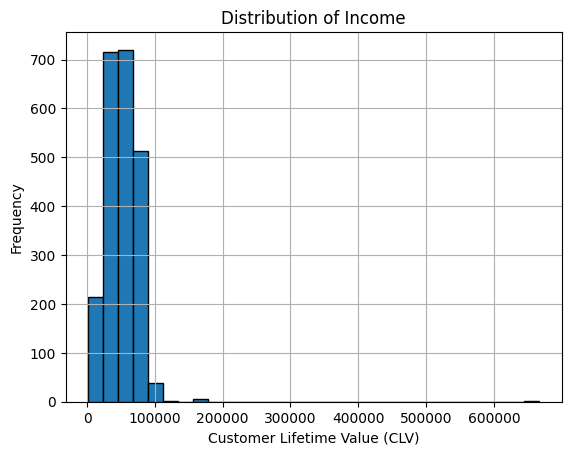

In [60]:
# Histogram of Income distribution
plt.hist(df['income'], bins=30, edgecolor='black')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.grid(True)
plt.show()

## Spread of Customer Lifetime Value

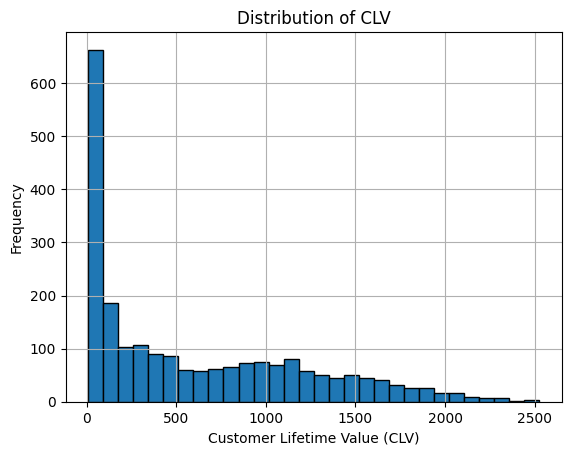

In [62]:
# Histogram of the CLV
plt.hist(df['clv'], bins=30, edgecolor='black')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Frequency')
plt.title('Distribution of CLV')
plt.grid(True)
plt.savefig('CLV_Distribution.png', transparent=True)
plt.show()

In [63]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,wines_sales,...,complain,response,total_sales,total_purchases,present_date,customer_lifespan_years,avg_purchase_value,purchase_frequency,clv,age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,1,1617,25,2016-06-29,3.819178,64.680000,6.545911,1617.0,59
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,27,6,2016-06-29,2.312329,4.500000,2.594787,27.0,62
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,776,21,2016-06-29,2.857534,36.952381,7.348993,776.0,51
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,53,8,2016-06-29,2.383562,6.625000,3.356322,53.0,32
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,422,19,2016-06-29,2.443836,22.210526,7.774664,422.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,1341,18,2016-06-29,3.046575,74.500000,5.908273,1341.0,49
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,444,22,2016-06-29,2.054795,20.181818,10.706667,444.0,70
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,1241,19,2016-06-29,2.427397,65.315789,7.827314,1241.0,35
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,843,23,2016-06-29,2.430137,36.652174,9.464487,843.0,60


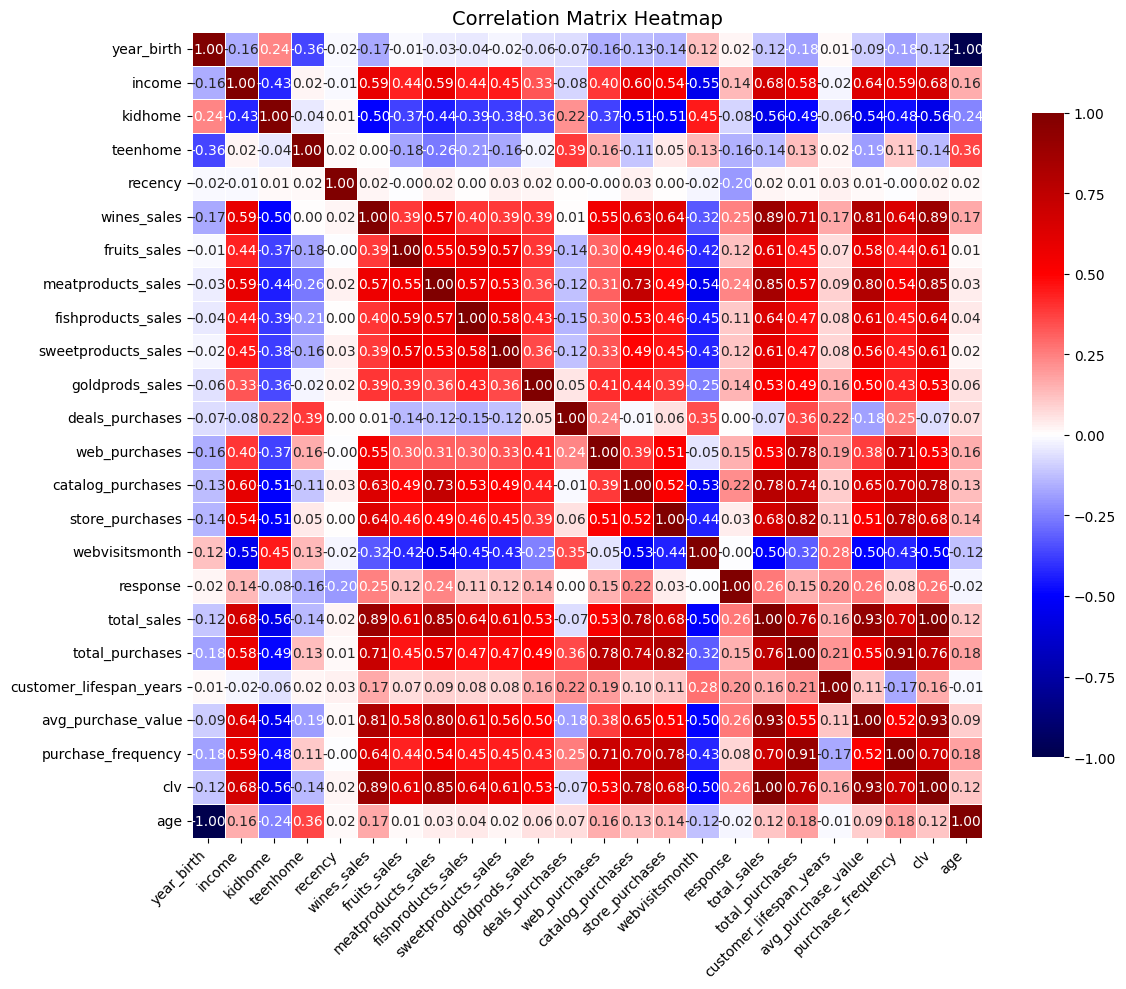

In [64]:
# Filter out non numeric columns
corr_df = df.drop(columns= ['id','present_date', 'dt_customer','education','marital_status','complain'], axis= 1)

# Create the correlation matrix
corr_matrix = corr_df.corr()

# Create a heatmap with stronger contrast using 'seismic' colormap
plt.figure(figsize=(12, 10))  # Increase the figure size
sns.heatmap(corr_matrix, annot=True, cmap='seismic', fmt=".2f", linewidths=0.5,
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 10},
            vmin=-1, vmax=1)  # Adjust color scale for stronger contrast

# Rotate the x and y axis labels for readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Add title and label
plt.title("Correlation Matrix Heatmap", fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save and show the plot
plt.savefig("Correlation_Matrix_Heatmap_Enhanced.png", bbox_inches='tight', transparent=True)
plt.show()

In [65]:
# Calculate the percentiles
bins = [0, df['clv'].quantile(0.25), df['clv'].quantile(0.75), df['clv'].max()]
labels = ['0', '1', '2']

# Create a new column with these categories
df['clv_class'] = pd.cut(df['clv'], bins=bins, labels=labels, include_lowest=True)

# Display the result
print(df[['clv', 'clv_class']].head())

df

      clv clv_class
0  1617.0         2
1    27.0         0
2   776.0         1
3    53.0         0
4   422.0         1


,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,wines_sales,...,response,total_sales,total_purchases,present_date,customer_lifespan_years,avg_purchase_value,purchase_frequency,clv,age,clv_class
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,1617,25,2016-06-29,3.819178,64.680000,6.545911,1617.0,59,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,27,6,2016-06-29,2.312329,4.500000,2.594787,27.0,62,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,776,21,2016-06-29,2.857534,36.952381,7.348993,776.0,51,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,53,8,2016-06-29,2.383562,6.625000,3.356322,53.0,32,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,422,19,2016-06-29,2.443836,22.210526,7.774664,422.0,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,1341,18,2016-06-29,3.046575,74.500000,5.908273,1341.0,49,2
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,444,22,2016-06-29,2.054795,20.181818,10.706667,444.0,70,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1241,19,2016-06-29,2.427397,65.315789,7.827314,1241.0,35,2
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,843,23,2016-06-29,2.430137,36.652174,9.464487,843.0,60,1


For the Customer Lifetime Value classes, I have seperated it into 3 different classes, 0, 1 and 2.

0 - Bottom Percentile, 0 - 25 %

1 - Middle Percentile, 26 - 74 %

2 - Top Percentile, 75 - 100 %

# Supervised Learning - Customer Lifetime Value

In this section, we will be trying to predict the CLV class of each of our customers using supervised machine learning techniques, such as Support Vector Machines, Random Forest and others.

## Import Machine Learning libraries 

In [70]:
# Import Machine Learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, auc,  precision_recall_curve

## Definte predictor variables (features) and target variable

In [72]:
model_df = df.drop(columns= ['id','present_date', 'dt_customer','education','marital_status','complain'], axis= 1)
model_df.sample(5)

,year_birth,income,kidhome,teenhome,recency,wines_sales,fruits_sales,meatproducts_sales,fishproducts_sales,sweetproducts_sales,...,webvisitsmonth,response,total_sales,total_purchases,customer_lifespan_years,avg_purchase_value,purchase_frequency,clv,age,clv_class
1081,1971,36715.0,1,0,16,172,10,125,21,13,...,9,1,357,19,3.616438,18.789474,5.253788,357.0,45,1
106,1964,49096.0,1,1,15,144,1,32,2,1,...,7,0,187,13,2.764384,14.384615,4.702676,187.0,52,1
1607,1990,51250.0,1,0,28,342,32,230,34,32,...,9,0,710,24,3.252055,29.583333,7.379949,710.0,26,1
2097,1956,54252.0,1,1,25,178,4,26,8,4,...,6,0,264,15,3.090411,17.600000,4.853723,264.0,60,1
1589,1987,75794.0,0,0,33,754,160,625,63,32,...,3,0,1682,25,2.515068,67.280000,9.940087,1682.0,29,2


In [73]:
model_df['clv_class'] = model_df['clv_class'].astype(int)

In [74]:
# Predictor Variables
X = model_df.drop(columns=['clv_class', 'clv', 'avg_purchase_value', 'total_sales'], axis= 1)

# Target Variables
y = model_df['clv_class']

## Split data into training and test sets

In [76]:
# Perform train-test split:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

## Scale our features

In [78]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest

In [80]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [81]:
# Make predictions on test set
y_pred = rf_model.predict(X_test_scaled)

# Get predicted probabilities for each class
y_pred_proba = rf_model.predict_proba(X_test_scaled)

# Accuracy check
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')


Accuracy: 0.9615

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       112
           1       0.97      0.95      0.96       214
           2       0.96      0.95      0.95       116

    accuracy                           0.96       442
   macro avg       0.96      0.96      0.96       442
weighted avg       0.96      0.96      0.96       442



In [82]:
# Create a summary helper function to consolidate everything

Accuracy : 0.9615 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9601 [Macro-average across classes]
Recall   : 0.9642 [Macro-average across classes]
ROC AUC  : 0.9971 [OvR Macro-average]
-----------------------------------------------------------------------------------------------------------


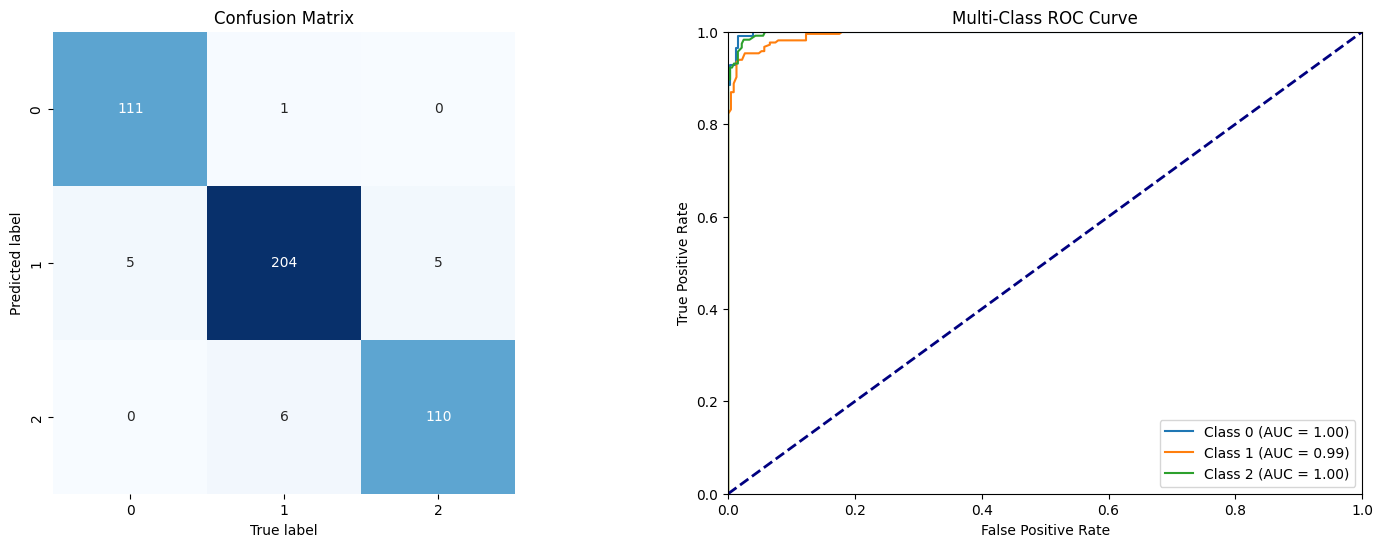

(0.9615384615384616,
 0.9600809784681119,
 0.9642061062259257,
 0.9970515372420033)

In [83]:
def show_summary_report(actual, prediction, probabilities):

    # Calculate model evaluation metrics
    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction, average='macro')  # Macro-average for multi-class
    recall_ = recall_score(actual, prediction, average='macro')        # Macro-average for multi-class
    roc_auc_ = roc_auc_score(actual, probabilities, multi_class='ovr', average='macro')

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [Macro-average across classes]' % precision_)
    print('Recall   : %.4f [Macro-average across classes]' % recall_)
    print('ROC AUC  : %.4f [OvR Macro-average]' % roc_auc_)
    print('-' * 107)

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns (no PR curve)

    # Plot Confusion Matrix
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', ax=ax[0])
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Multi-class ROC curve (one-vs-rest)
    fpr, tpr, roc_auc = {}, {}, {}
    n_classes = probabilities.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(actual == i, probabilities[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    for i in range(n_classes):
        ax[1].plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Multi-Class ROC Curve')
    ax[1].legend(loc='lower right')

    plt.show()

    return accuracy_, precision_, recall_, roc_auc_


show_summary_report(y_test, y_pred, y_pred_proba)

# Support Vector Machines

In [85]:
# Initialize and train the SVM model (with RBF kernel)
svm_model = SVC(kernel='linear', C=1, gamma='scale', random_state= 42, probability= True)  # You can tune C and gamma
svm_model.fit(X_train_scaled, y_train)

# Make predictions on test set
svm_y_pred = svm_model.predict(X_test_scaled)

# Get predicted probabilities for each class
svm_y_pred_proba = svm_model.predict_proba(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, svm_y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, svm_y_pred))


Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       112
           1       0.97      0.94      0.96       214
           2       1.00      0.96      0.98       116

    accuracy                           0.96       442
   macro avg       0.96      0.96      0.96       442
weighted avg       0.96      0.96      0.96       442



Accuracy : 0.9593 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9579 [Macro-average across classes]
Recall   : 0.9640 [Macro-average across classes]
ROC AUC  : 0.9963 [OvR Macro-average]
-----------------------------------------------------------------------------------------------------------


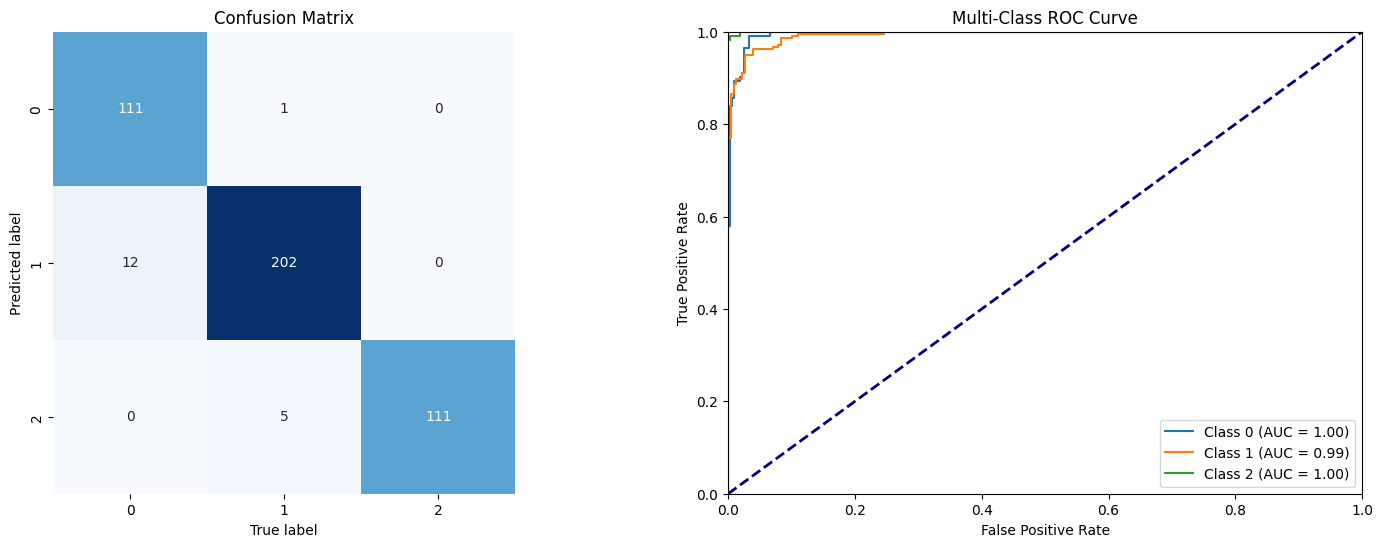

(0.9592760180995475,
 0.9578642901813633,
 0.9639644046468088,
 0.9962932950641439)

In [86]:
show_summary_report(y_test, svm_y_pred, svm_y_pred_proba)

# Logistic Regression

In [88]:
# Create an instance of Logistic Regression
lr_model = LogisticRegression(solver='lbfgs', max_iter=500, random_state= 42)

lr_model.fit(X_train_scaled, y_train)

# Make predictions on test set
lr_y_pred = lr_model.predict(X_test_scaled)

# Get predicted probabilities for each class
lr_y_pred_proba = lr_model.predict_proba(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, lr_y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, lr_y_pred))


Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       112
           1       0.95      0.93      0.94       214
           2       1.00      0.97      0.98       116

    accuracy                           0.94       442
   macro avg       0.94      0.95      0.94       442
weighted avg       0.94      0.94      0.94       442



Accuracy : 0.9434 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9434 [Macro-average across classes]
Recall   : 0.9459 [Macro-average across classes]
ROC AUC  : 0.9933 [OvR Macro-average]
-----------------------------------------------------------------------------------------------------------


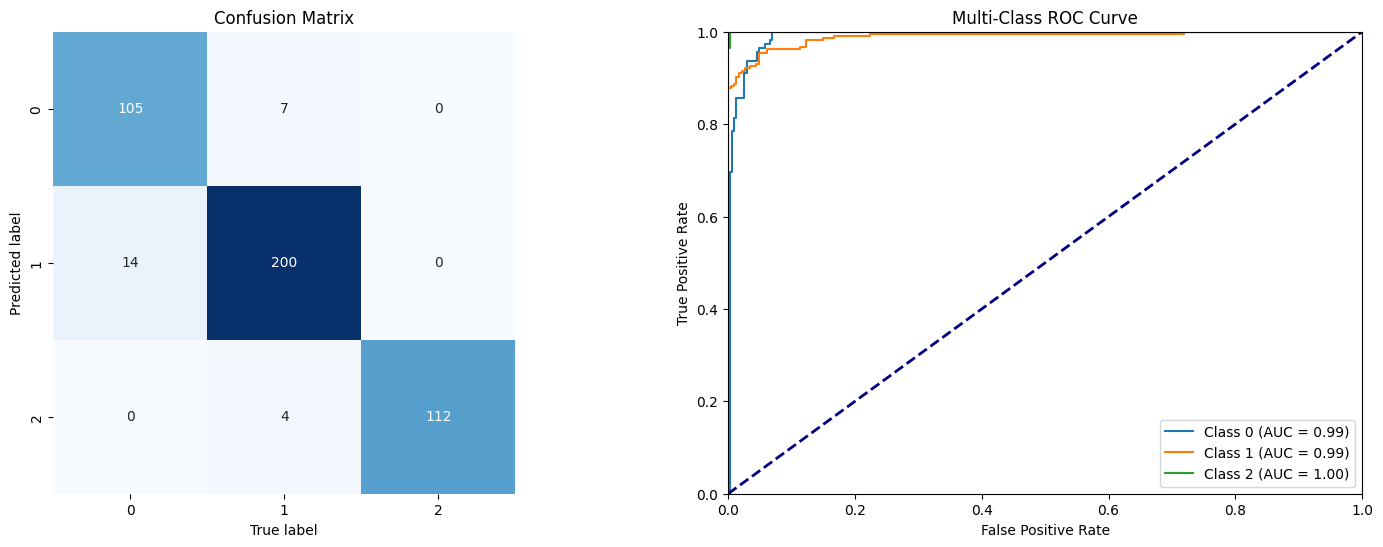

(0.9434389140271493, 0.9434067465848899, 0.945865560210549, 0.9933024205733112)

In [89]:
show_summary_report(y_test, lr_y_pred, lr_y_pred_proba)

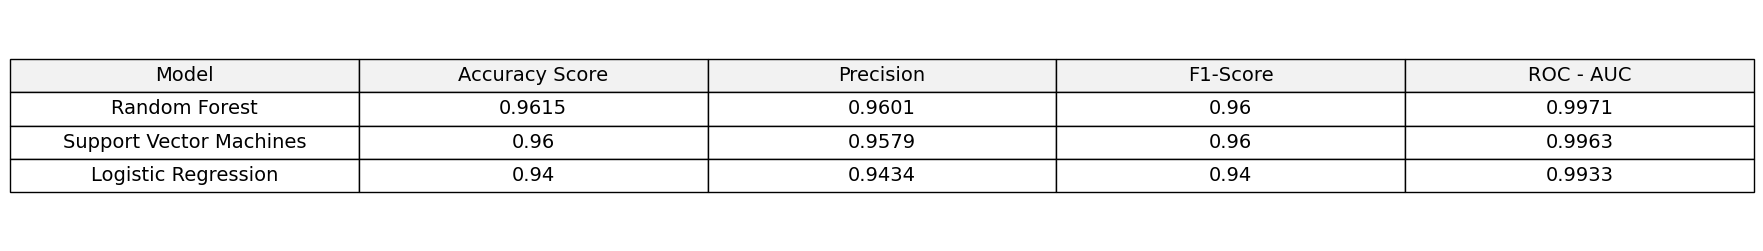

In [90]:
import dataframe_image as dfi


# Your data
data = {
    'Model': ['Random Forest', 'Support Vector Machines', 'Logistic Regression'],
    'Accuracy Score': [0.9615, 0.96, 0.94],
    'Precision': [0.9601, 0.9579, 0.9434],
    'F1-Score' : [0.96, 0.96, 0.94],
    'ROC - AUC' : [0.9971, 0.9963, 0.9933]
}

table_df = pd.DataFrame(data)

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 3))  # Wider for longer words
ax.axis('off')

# Create the table
table = ax.table(
    cellText=table_df.values,
    colLabels=table_df.columns,
    loc='center',
    cellLoc='center',
    colColours=['#f2f2f2'] * df.shape[1]
)

# Make text readable
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 2)  # Increase cell size (width, height)

# Manually adjust column widths if needed
# This part is optional, but useful for full control
for (row, col), cell in table.get_celld().items():
    cell.set_width(0.45)  # You can tweak this value per column

# Save the image with tight bounding box and high DPI
plt.savefig('table_image.png', bbox_inches='tight', dpi=300)

# Feature Importance

## Random Forest feature importance

               feature  importance
5          wines_sales    0.207603
7   meatproducts_sales    0.195014
1               income    0.074577
17     total_purchases    0.072574
13   catalog_purchases    0.071517


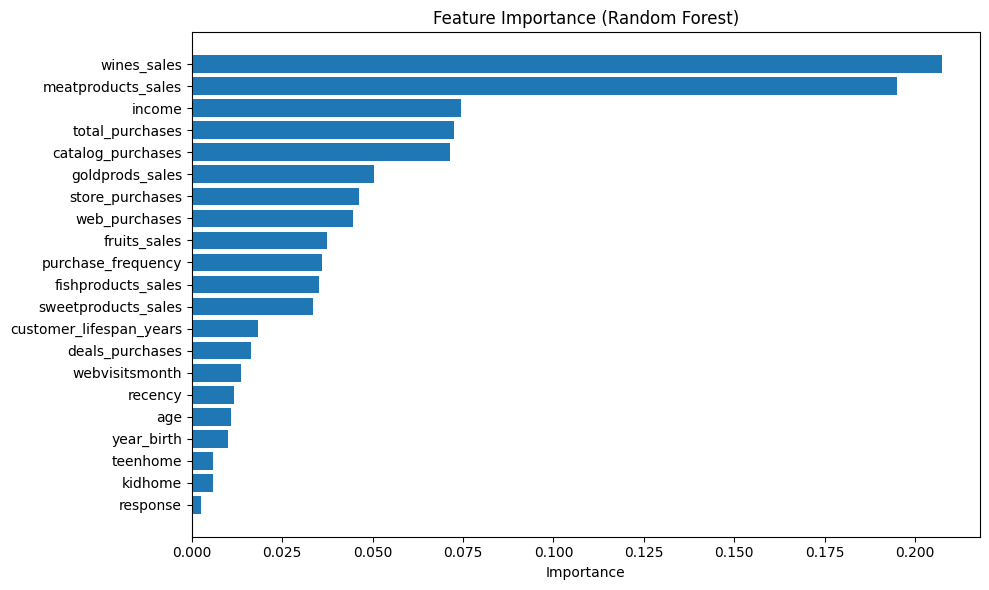

In [93]:
# Create a DataFrame of feature importances
rf_feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Display top features
print(rf_feature_importances.head())

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importances['feature'], rf_feature_importances['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Most important at the top
plt.tight_layout()
plt.show()

## Support Vector Machines feature importance

               feature  importance
5          wines_sales    5.189323
10     goldprods_sales    2.778444
7   meatproducts_sales    2.713196
14     store_purchases    2.335462
17     total_purchases    1.844322


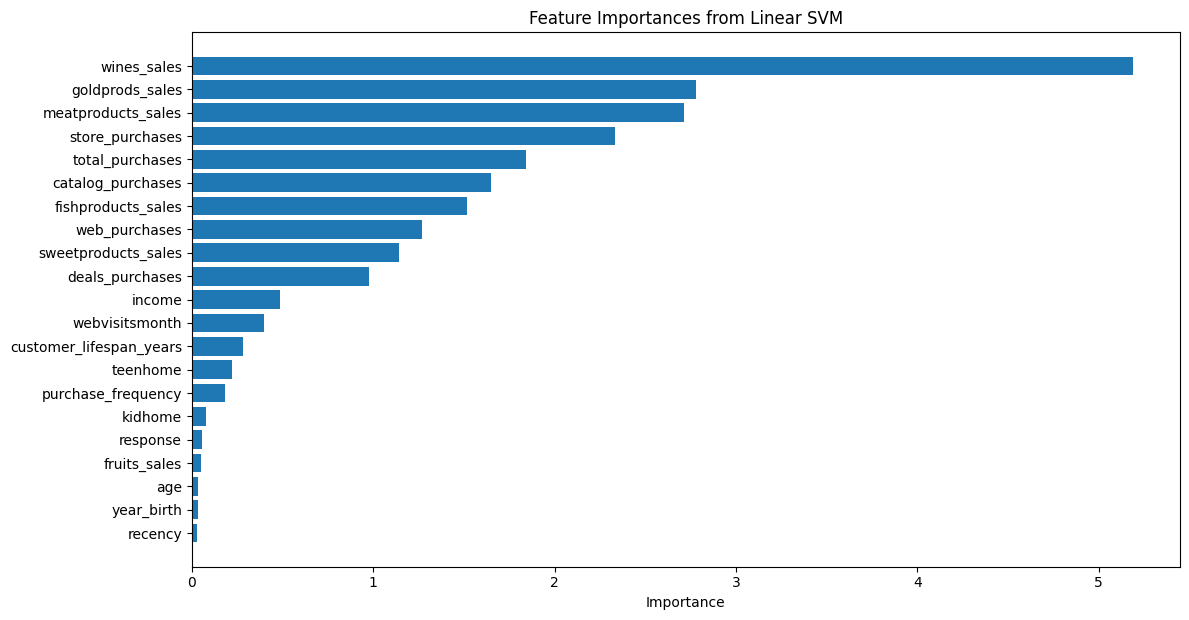

In [95]:
# Get feature importance (absolute value of coefficients)
importance = np.abs(svm_model.coef_[0])

# Create DataFrame and sort
top_features_df = pd.DataFrame({
    'feature': X_train.columns,  # or X_train_scaled.columns if it's a DataFrame
    'importance': importance
}).sort_values(by='importance', ascending=False).head(5)

print(top_features_df)

# If you have feature names (e.g., from a DataFrame)
feature_names = X_train.columns  # Use X_train.columns if you scaled with a DataFrame

# Create a DataFrame for sorting and plotting
svm_feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot ALL features
plt.figure(figsize=(12, len(feature_names) * 0.3))  # Adjust height for readability
plt.barh(svm_feat_imp_df['Feature'][::-1], svm_feat_imp_df['Importance'][::-1])
plt.xlabel('Importance')
plt.title('Feature Importances from Linear SVM')
plt.tight_layout()
plt.show()

## Logistic Regression feature importance

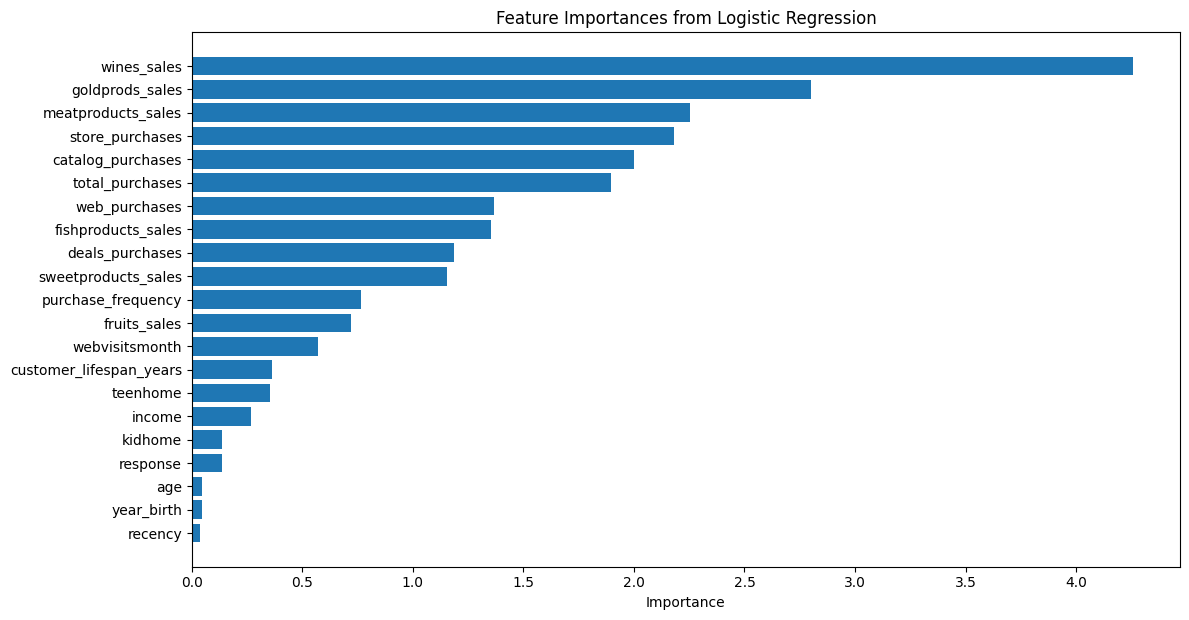

In [97]:
# Get coefficients (1D array for binary classification)
importance = np.abs(lr_model.coef_[0])  # Use abs to reflect magnitude of effect

# Get feature names
feature_names = X_train.columns # Only works if you used a DataFrame

# Create a DataFrame for plotting
lr_feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot all features
plt.figure(figsize=(12, len(feature_names) * 0.3))  # Dynamic height
plt.barh(lr_feat_imp_df['Feature'][::-1], lr_feat_imp_df['Importance'][::-1])
plt.xlabel('Importance')
plt.title('Feature Importances from Logistic Regression')
plt.tight_layout()
plt.show()

## Identifying top features

<Figure size 640x480 with 0 Axes>

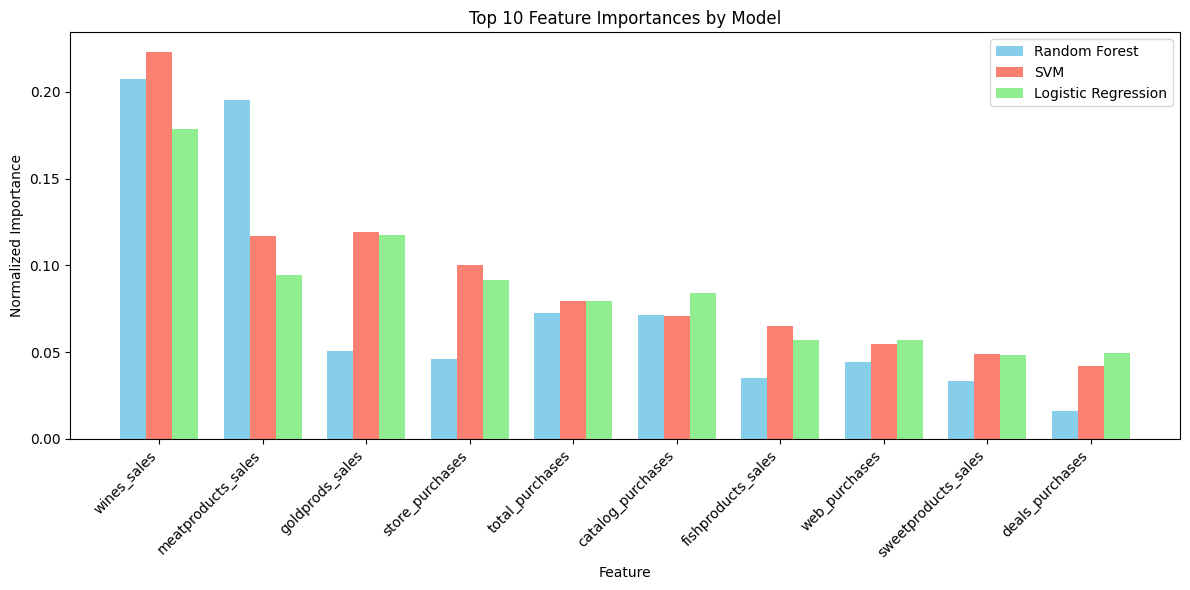

In [99]:
# Normalize Random Forest (already normalized, but do it just in case)
rf_df = rf_feature_importances.copy()
rf_df['importance'] = rf_df['importance'] / rf_df['importance'].sum()
rf_df.rename(columns={'feature': 'Feature', 'importance': 'importance_rf'}, inplace=True)

# Normalize SVM
svm_df = svm_feat_imp_df.copy()
svm_df['Importance'] = svm_df['Importance'].abs()
svm_df['importance_svm'] = svm_df['Importance'] / svm_df['Importance'].sum()
svm_df = svm_df[['Feature', 'importance_svm']]

# Normalize Logistic Regression
lr_df = lr_feat_imp_df.copy()
lr_df['Importance'] = lr_df['Importance'].abs()
lr_df['importance_lr'] = lr_df['Importance'] / lr_df['Importance'].sum()
lr_df = lr_df[['Feature', 'importance_lr']]

# Merge all on 'Feature'
merged_df = rf_df.merge(svm_df, on='Feature').merge(lr_df, on='Feature')

# Calculate mean importance
merged_df['mean_importance'] = merged_df[['importance_rf', 'importance_svm', 'importance_lr']].mean(axis=1)

# Sort by mean importance and get top 10
top_10_features = merged_df.sort_values(by='mean_importance', ascending=False).head(10)

plt.savefig('features.png', bbox_inches='tight', dpi=300)
top_10_features

# Set the figure size
plt.figure(figsize=(12, 6))

# Set positions and width
features = top_10_features['Feature']
x = np.arange(len(features))  # label locations
width = 0.25

# Plot bars for each model
plt.bar(x - width, top_10_features['importance_rf'], width=width, label='Random Forest', color='skyblue')
plt.bar(x, top_10_features['importance_svm'], width=width, label='SVM', color='salmon')
plt.bar(x + width, top_10_features['importance_lr'], width=width, label='Logistic Regression', color='lightgreen')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Normalized Importance')
plt.title('Top 10 Feature Importances by Model')
plt.xticks(ticks=x, labels=features, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('top_features.png', transparent= True)
plt.show()

# Application of insights

From the top 10 features collected from each of the 3 models tested, we can see that the amount spent on the different products play a big role in predicting and classifying what tier of CLV the customer would fall in. So, I want to retrain the best performing model with these key features so we can use spending habits to predict their CLV. 

# Random Forest Classification Model - Using Customer Expenditure Information

In [102]:
# Setting new and more refined predictor Variables
X = model_df[['wines_sales','meatproducts_sales','goldprods_sales', 'sweetproducts_sales','fishproducts_sales']]

# Target variable
y = model_df['clv_class']

# Perform train-test split:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [103]:
# We use random forest because it was the best performing one

new_rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Initialize the RandomForestClassifier

new_rf_model.fit(X_train, y_train)

# Make predictions on test set
new_rf_y_pred = new_rf_model.predict(X_test)

# Get predicted probabilities for each class
new_rf_y_pred_proba = new_rf_model.predict_proba(X_test)

# Accuracy check
accuracy = accuracy_score(y_test, new_rf_y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, new_rf_y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, new_rf_y_pred_proba, multi_class='ovr', average='macro')
# ROC AUC score
roc_auc = roc_auc_score(y_test, new_rf_y_pred_proba, multi_class='ovr', average='macro')

print("ROC AUC Score (OvR, Macro):", roc_auc)

Accuracy: 0.9751

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       112
           1       0.97      0.98      0.97       214
           2       0.99      0.96      0.97       116

    accuracy                           0.98       442
   macro avg       0.98      0.97      0.98       442
weighted avg       0.98      0.98      0.98       442

ROC AUC Score (OvR, Macro): 0.9979024979497675


Accuracy : 0.9751 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9761 [Macro-average across classes]
Recall   : 0.9749 [Macro-average across classes]
ROC AUC  : 0.9979 [OvR Macro-average]
-----------------------------------------------------------------------------------------------------------


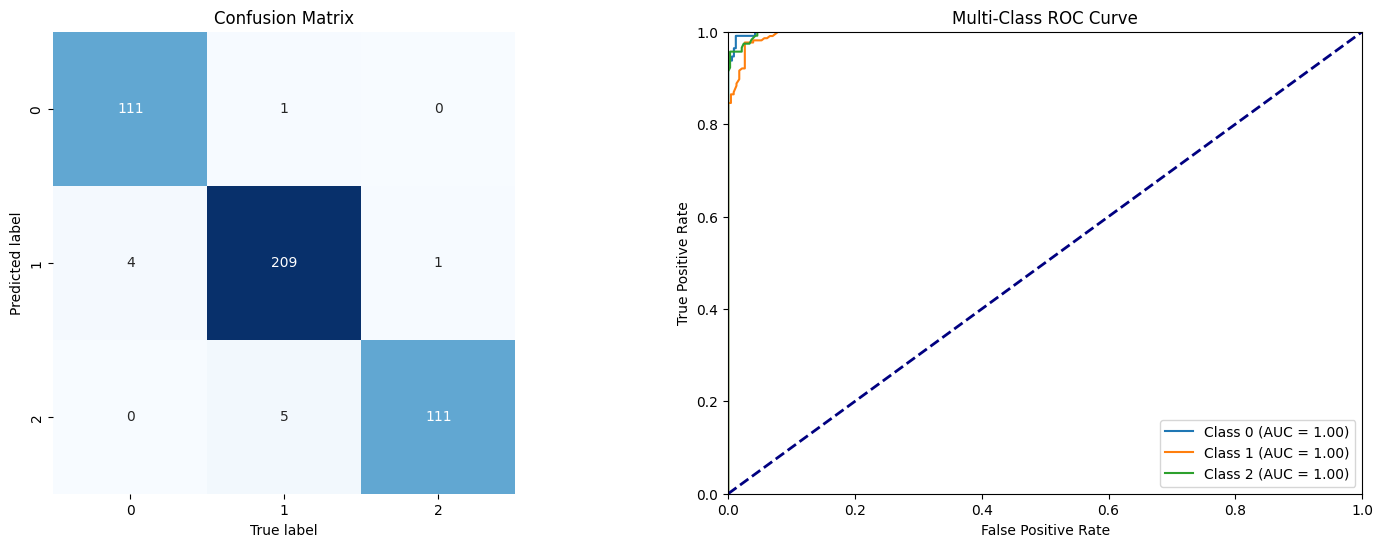

(0.9751131221719457,
 0.9761272810438634,
 0.9748678314380861,
 0.9979024979497675)

In [104]:
show_summary_report(y_test, new_rf_y_pred, new_rf_y_pred_proba)

With the new random forest model trained with only the spending information of our customers, we can see that we achieve an accuracy score of 0.9751, meaning we can gauge some of our customer's lifetime value using spending patterns and habits.

# Unsupervised Learning - Customer Segmentation

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2209 non-null   int64         
 1   year_birth               2209 non-null   int64         
 2   education                2209 non-null   object        
 3   marital_status           2209 non-null   object        
 4   income                   2209 non-null   float64       
 5   kidhome                  2209 non-null   int64         
 6   teenhome                 2209 non-null   int64         
 7   dt_customer              2209 non-null   datetime64[ns]
 8   recency                  2209 non-null   int64         
 9   wines_sales              2209 non-null   int64         
 10  fruits_sales             2209 non-null   int64         
 11  meatproducts_sales       2209 non-null   int64         
 12  fishproducts_sales       2209 non-null 

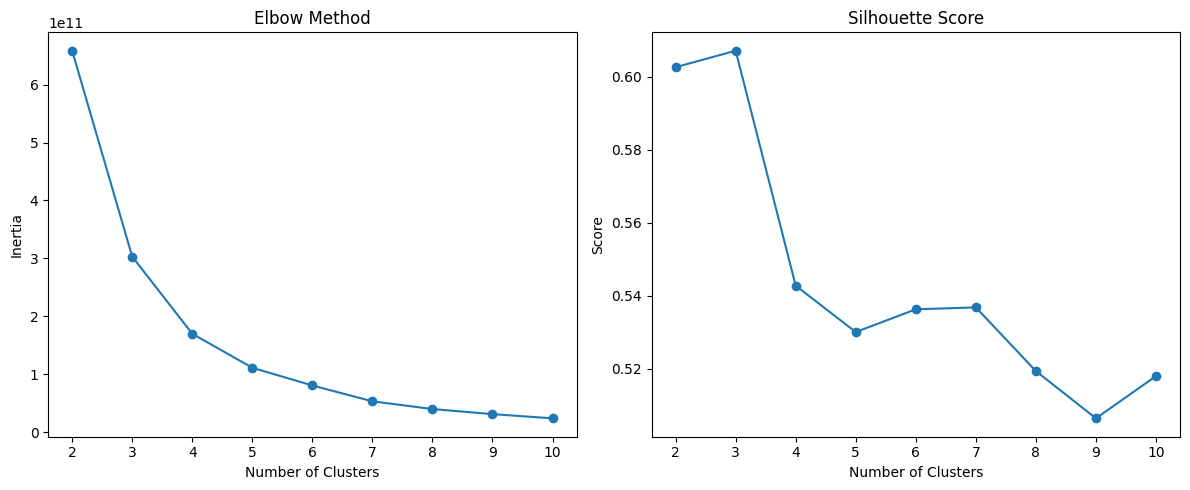

In [205]:
# Create temporary dataframe for unsupervised learning (avoid categorical data for this project) 
uns_df = df.drop(columns=['id', 'year_birth','education','marital_status', 'dt_customer', 'present_date', 'clv', 'clv_class'], axis=1)

# 1. Standardize your data (important for KMeans)
scaler = StandardScaler()
uns_df_scaled = scaler.fit_transform(uns_df)

# Store results
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(uns_df)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(uns_df, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.savefig('elbow_silhouette.png')
plt.show()

In [249]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(uns_df_scaled)

# Add cluster labels to your original DataFrame
uns_df['cluster'] = kmeans.labels_

In [251]:
cluster_summary = uns_df.groupby('cluster').mean()
cluster_summary

,income,kidhome,teenhome,recency,wines_sales,fruits_sales,meatproducts_sales,fishproducts_sales,sweetproducts_sales,goldprods_sales,...,store_purchases,webvisitsmonth,complain,response,total_sales,total_purchases,customer_lifespan_years,avg_purchase_value,purchase_frequency,age
cluster,,,,,,,,,,,,,,,,,,,,,
0,57476.196141,0.260450,0.909968,47.983923,441.530547,21.816720,131.517685,29.128617,22.422830,59.000000,...,7.723473,5.739550,0.009646,0.125402,705.416399,20.877814,3.096344,33.380154,6.907427,50.991961
1,34577.772052,0.783944,0.444004,49.150644,39.667988,4.950446,22.329039,7.317146,5.111001,15.341923,...,3.199207,6.434093,0.011893,0.088206,94.717542,7.802775,2.883851,11.062416,2.783749,44.355798
2,77233.871972,0.041522,0.181661,49.780277,623.946367,68.660900,458.735294,99.970588,70.453287,77.844291,...,8.330450,2.918685,0.003460,0.287197,1399.610727,20.920415,2.994028,69.593355,7.201500,47.612457


find average sales, frequency and recency for each cluster and comapare them and gather insights.

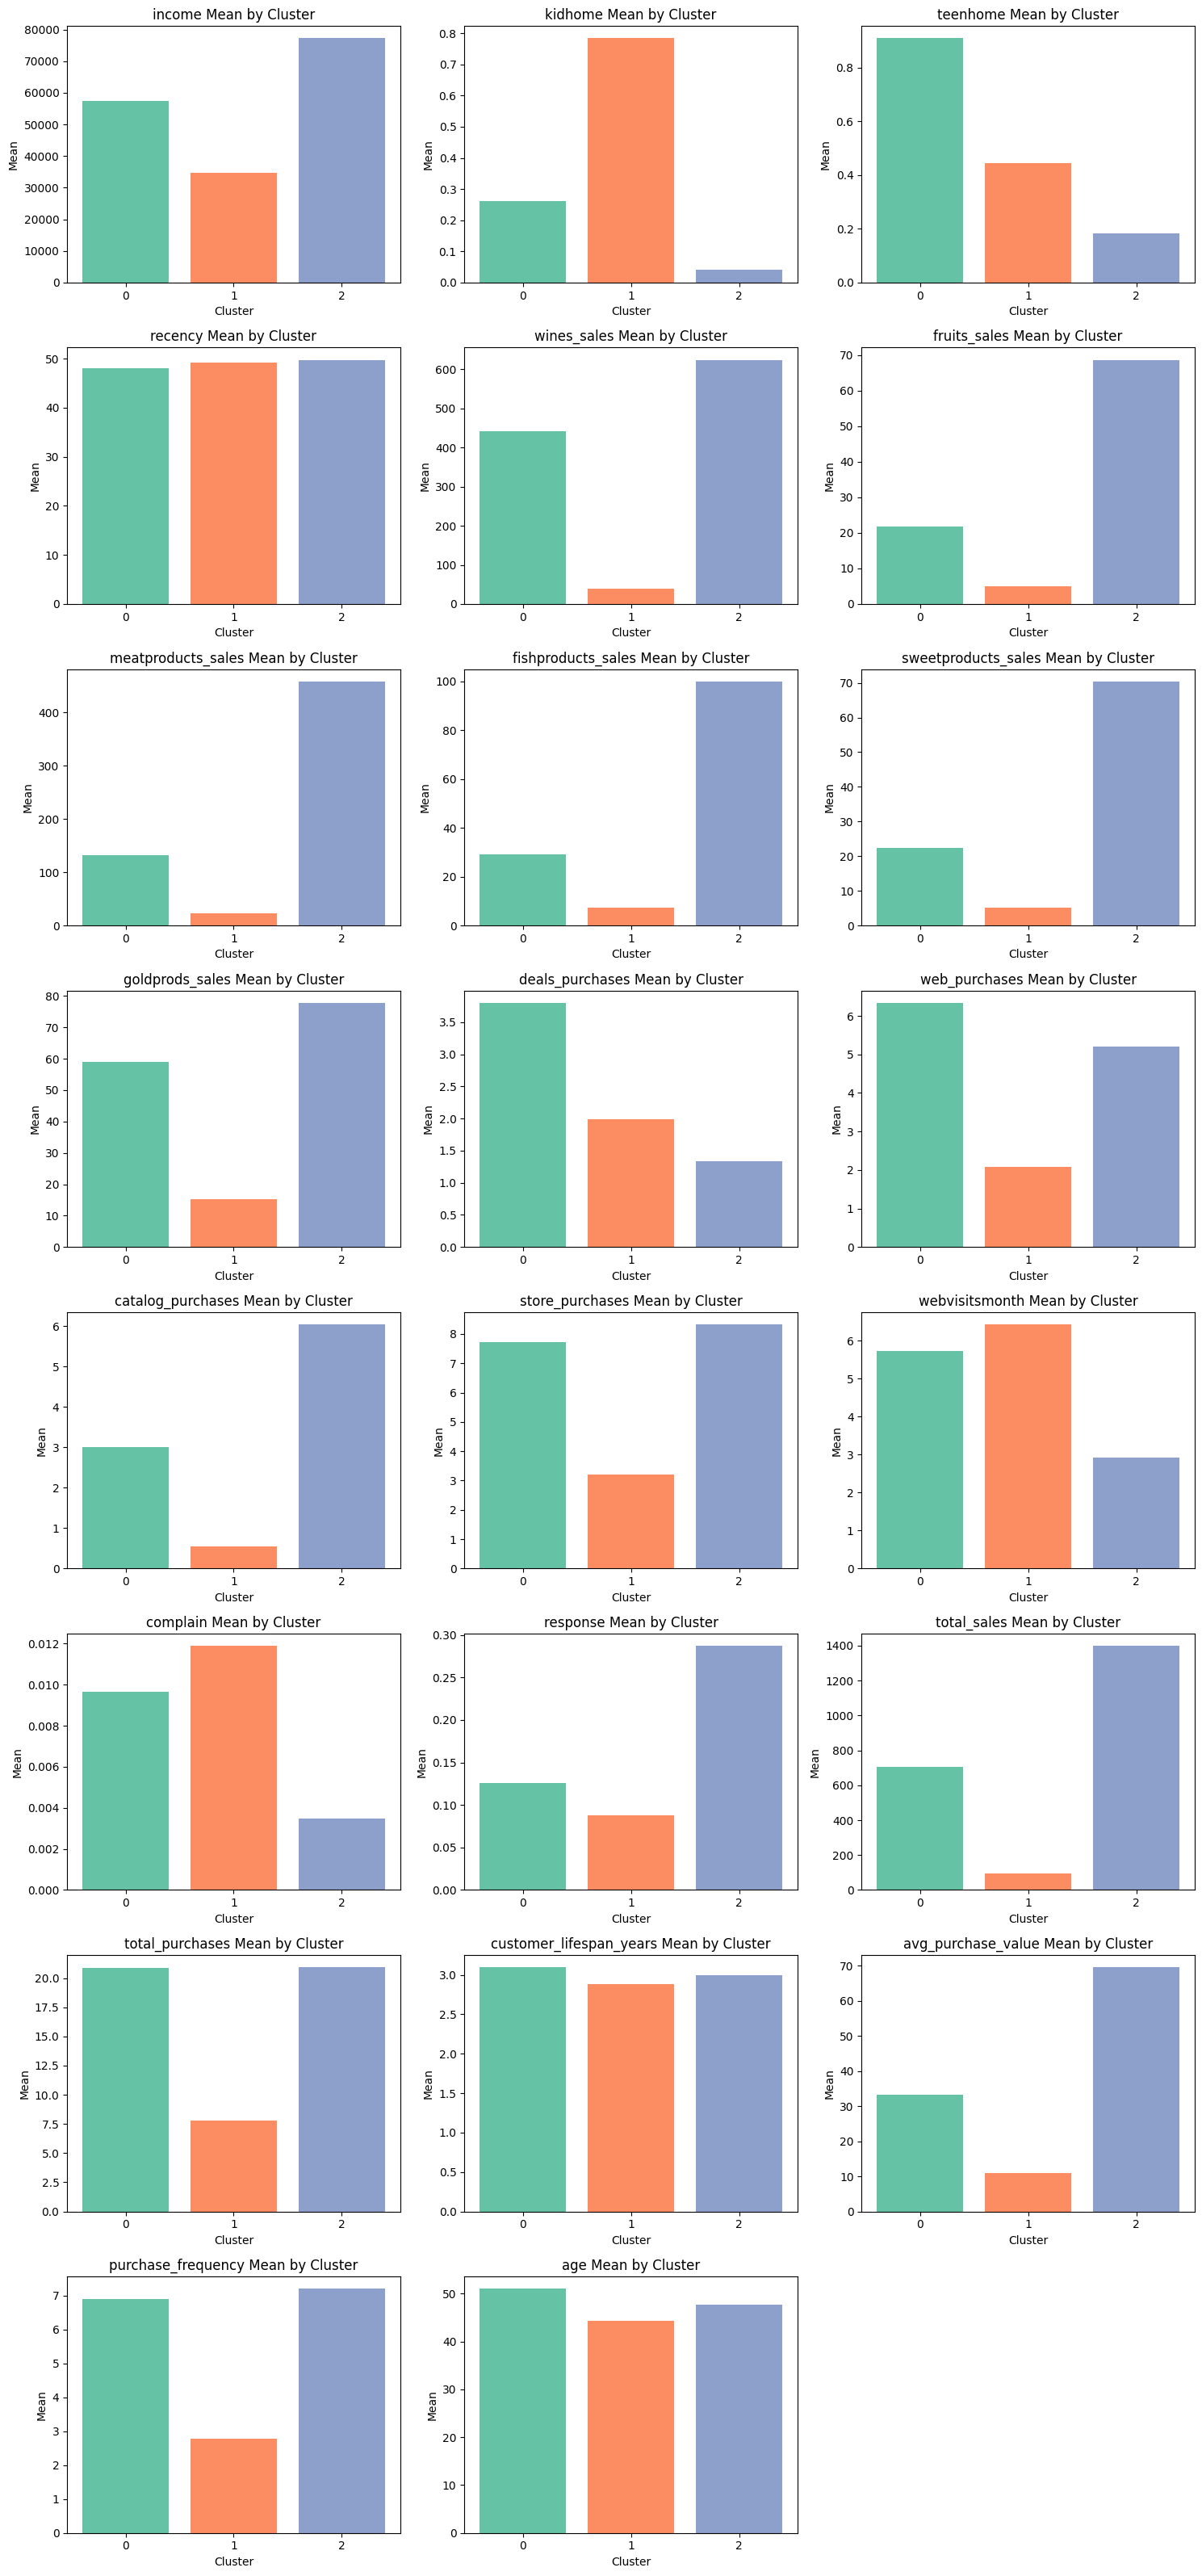

In [274]:
import math

# Get number of features
features = cluster_summary.columns
num_features = len(features)

# Create subplots grid
cols = 3  # You can change this
rows = math.ceil(num_features / cols)

# Set color palette
colors = sns.color_palette("Set2", n_colors=len(cluster_summary))

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten to make it iterable

# Plot each feature
for i, feature in enumerate(features):
    ax = axes[i]
    bars = ax.bar(cluster_summary.index, cluster_summary[feature], color=colors)
    ax.set_title(f'{feature} Mean by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Mean')
    ax.set_xticks(cluster_summary.index)

# Hide unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('cluster_distribution.png')
plt.show()

From the graphs above, we can see the cluster 2, which has the highest expenditure has the least number of kids and teenager in their household on average, compared to clusters 0 and 1.

Cluster 0 has second highest purchasing frequency, the most number of teenagers on average in their household and seem to have the highest customer life span by years among the 3 clusters. Purchasing the most with deals and through the websites, probably cause of teenagers and their usage of internet. Middle Age with kids/teenagers.

Cluster 1 has highest number of web visits, however, lowest purchasing power, they have most number of kids/ young children on average in their households. May be the cause as they do not have the time to go out and shop, leading to online shopping in this category, as seen with the highest number of website visits per out of all of them. Use online marketing campaigns to try and reach out to these people. Younger parents with children.

Cluster 2 has the highest spending and purchasing frequency, highest in both catalogue and in store purchases. This means they go out more and in person store experience may help to boost even more sales. Middle Age with no kids.

In [256]:
n_components = 3

In [257]:
# # Helper functions from Lab 6.4
# def calculate_cum_var_exp(eig_vals):
#     tot = sum(eig_vals)
#     #var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
#     #var_exp = [(i / tot)*100 for i in eig_vals]
#     var_exp = []
#     for i in eig_vals:
#         var_i = (i / tot)*100
#         var_exp.append(var_i)
#     cum_var_exp = np.cumsum(var_exp)
#     return cum_var_exp

# total_variance = pca.explained_variance_.sum()
# pca_variance = list(zip(range(1, len(pca.explained_variance_) + 1), (100 * pca.explained_variance_/total_variance)))
# cum_pca_variance= calculate_cum_var_exp(pca.explained_variance_)

# cum_pca_variance

# # Unpack the principal components and their explained variance
# components, explained_variance = zip(*pca_variance)

# # Create a figure with two subplots side by side
# fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# # Plot 1: Histogram of explained variance ratios
# axes[0].bar(components, explained_variance, color='grey', edgecolor='black')
# axes[0].set_xlabel('Principal Components', fontsize=12)
# axes[0].set_ylabel('Explained Variance', fontsize=12)
# axes[0].set_title('Explained Variance by Component', fontsize=14)
# axes[0].set_xticks(components)

# # Plot 2: Plot cumulative variance explained vs number of components
# axes[1].plot(
#     range(1, n_components+1),  # Adjust based on the number of components
#     (cum_pca_variance),  # Matching cumulative variance formula
#     marker='o',
#     linestyle='-',
#     color='grey',
#     label='Cumulative Variance Explained'
# )
# axes[1].set_xlabel('Number of Principal Components', fontsize=12)
# axes[1].set_ylabel('Cumulative Variance Explained (%)', fontsize=12)
# axes[1].set_title('Cumulative Variance Explained', fontsize=14)
# axes[1].tick_params(axis='both', labelsize=10)
# axes[1].set_xticks(np.arange(1, n_components + 1, 1))
# axes[1].legend(fontsize=10)

# # Adjust layout for better spacing
# plt.tight_layout()
# plt.savefig("principal_component_analysis.png", dpi=200)
# plt.show()

In [261]:
uns_df_scaled.shape

(2209, 23)

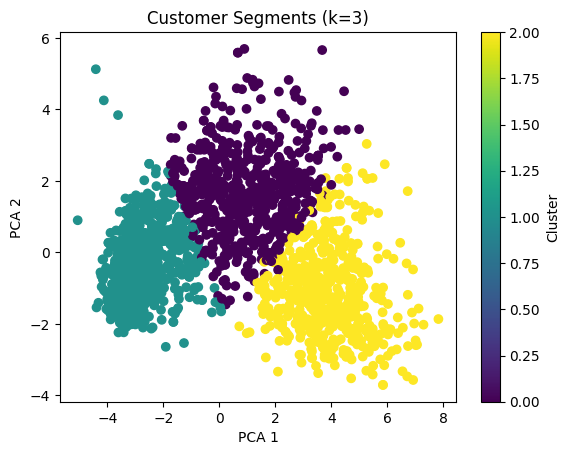

In [263]:
pca = PCA(n_components = n_components)
reduced_data = pca.fit_transform(uns_df_scaled)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=uns_df['cluster'], cmap='viridis')
plt.title('Customer Segments (k=3)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.savefig('customer_segments.png')
plt.show()

In [265]:
new_df = df.drop(columns=['id', 'year_birth','education','marital_status', 'dt_customer', 'present_date', 'clv'], axis=1)

In [267]:
# Add cluster labels to your original DataFrame
new_df['cluster'] = kmeans.labels_
new_df

,income,kidhome,teenhome,recency,wines_sales,fruits_sales,meatproducts_sales,fishproducts_sales,sweetproducts_sales,goldprods_sales,...,complain,response,total_sales,total_purchases,customer_lifespan_years,avg_purchase_value,purchase_frequency,age,clv_class,cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,1617,25,3.819178,64.680000,6.545911,59,2,2
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,27,6,2.312329,4.500000,2.594787,62,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,776,21,2.857534,36.952381,7.348993,51,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,53,8,2.383562,6.625000,3.356322,32,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,422,19,2.443836,22.210526,7.774664,35,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,1341,18,3.046575,74.500000,5.908273,49,2,2
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,444,22,2.054795,20.181818,10.706667,70,1,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,1241,19,2.427397,65.315789,7.827314,35,2,2
2238,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,843,23,2.430137,36.652174,9.464487,60,1,0


In [269]:
cross_tab = pd.crosstab(new_df['cluster'], new_df['clv_class'], normalize='index')
print(cross_tab)

clv_class         0         1         2
cluster                                
0          0.000000  0.834405  0.165595
1          0.549058  0.450942  0.000000
2          0.001730  0.221453  0.776817


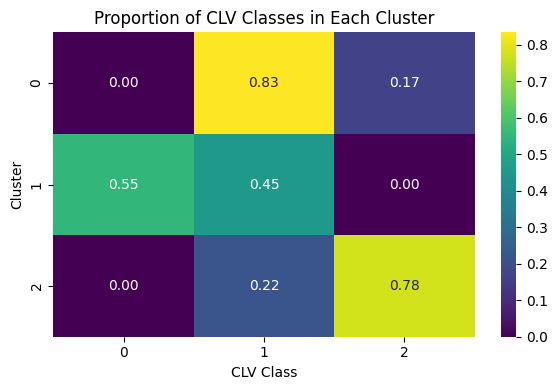

In [271]:

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='.2f')
plt.title('Proportion of CLV Classes in Each Cluster')
plt.xlabel('CLV Class')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

CLV Class 0 - 1-25%

CLV Class 1 - 26 - 74%

CLV Class 2 - 75 - 100%

Cluster 0 falls mainly in the CLV class 1

Cluster 2 has the highest proportion in CLV class 2, which means top 25% of Customer Lifetime Value tier.